# Loop 42 Analysis: Aggressive Regularization Hypothesis Testing

## Key Question
Should we submit exp_043 (aggressive regularization) to test if the CV-LB gap is due to overfitting?

## Current State
- Best CV: 0.008194 (exp_032)
- Best LB: 0.0877 (exp_030)
- Target: 0.0347
- exp_043 CV: 0.009002 (9.79% worse than best)

## Hypothesis
If the CV-LB gap is due to overfitting, aggressive regularization should:
1. Make CV worse (confirmed: 9.79% worse)
2. Make LB better relative to CV (untested - requires submission)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))
print(f'\nCV-LB ratio range: {df["lb"].min()/df["cv"].min():.2f}x to {df["lb"].max()/df["cv"].max():.2f}x')

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877

CV-LB ratio range: 10.57x to 8.66x


In [2]:
# Fit linear model to CV-LB relationship
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])
print(f'CV-LB Linear Fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'Intercept vs Target: {intercept/0.0347:.2f}x')

# Predict LB for exp_043
exp_043_cv = 0.009002
predicted_lb = slope * exp_043_cv + intercept
print(f'\n=== exp_043 Predictions ===')
print(f'exp_043 CV: {exp_043_cv:.6f}')
print(f'Predicted LB (using old relationship): {predicted_lb:.4f}')
print(f'Best LB so far: 0.0877')
print(f'\nIf predicted LB is correct: exp_043 would be WORSE than best LB')
print(f'If actual LB is BETTER than predicted: overfitting hypothesis CONFIRMED')

CV-LB Linear Fit: LB = 4.30 * CV + 0.0524
R² = 0.9675

Intercept: 0.0524
Target: 0.0347
Intercept vs Target: 1.51x

=== exp_043 Predictions ===
exp_043 CV: 0.009002
Predicted LB (using old relationship): 0.0912
Best LB so far: 0.0877

If predicted LB is correct: exp_043 would be WORSE than best LB
If actual LB is BETTER than predicted: overfitting hypothesis CONFIRMED


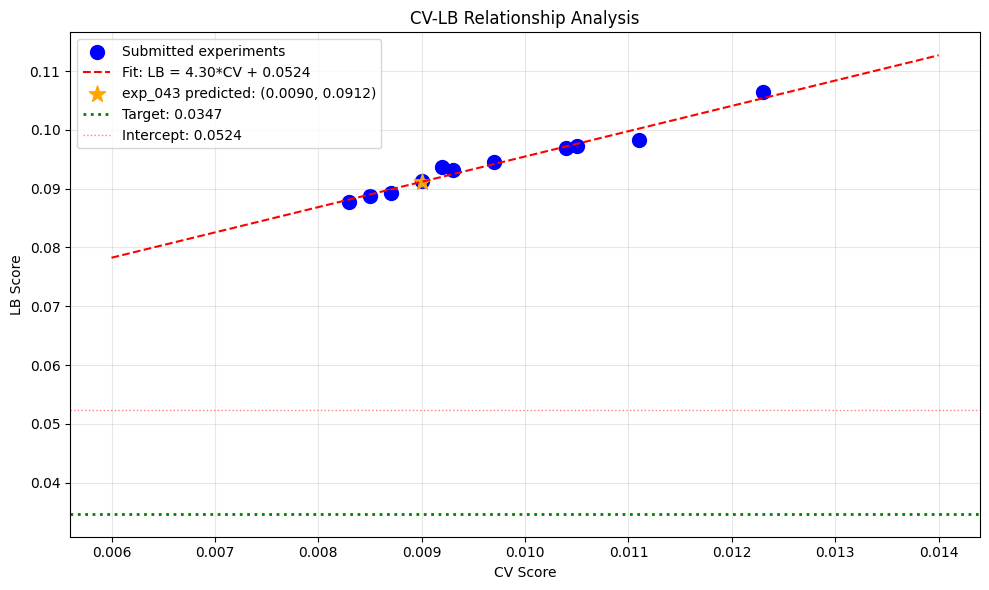


Plot saved to loop42_cv_lb.png


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, c='blue', label='Submitted experiments')

# Fit line
cv_range = np.linspace(0.006, 0.014, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Mark exp_043
plt.scatter([exp_043_cv], [predicted_lb], s=150, c='orange', marker='*', label=f'exp_043 predicted: ({exp_043_cv:.4f}, {predicted_lb:.4f})')

# Mark target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target: 0.0347')

# Mark intercept
plt.axhline(y=intercept, color='red', linestyle=':', linewidth=1, alpha=0.5, label=f'Intercept: {intercept:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/loop42_cv_lb.png', dpi=100)
plt.show()
print('\nPlot saved to loop42_cv_lb.png')

In [4]:
# Key Decision Analysis
print('=== DECISION ANALYSIS ===')
print()
print('OPTION 1: Submit exp_043 (aggressive regularization)')
print('  - CV: 0.009002 (9.79% worse than best CV 0.008194)')
print(f'  - Predicted LB: {predicted_lb:.4f}')
print('  - Purpose: Test if regularization reduces CV-LB gap')
print('  - Risk: Uses 1 of 5 remaining submissions')
print('  - Reward: If LB < predicted, confirms overfitting hypothesis')
print()
print('OPTION 2: Continue experimenting without submission')
print('  - Try even more aggressive regularization')
print('  - Try different model architectures')
print('  - Risk: No feedback on whether approach is working')
print()
print('=== RECOMMENDATION ===')
print('The evaluator strongly recommends submitting exp_043.')
print('Rationale:')
print('  1. We have 5 submissions remaining - can afford to test hypothesis')
print('  2. The hypothesis is well-designed and testable')
print('  3. Without submission, we cannot validate the approach')
print('  4. If hypothesis is confirmed, we know to pursue more regularization')
print('  5. If hypothesis is rejected, we know to try different approaches')

=== DECISION ANALYSIS ===

OPTION 1: Submit exp_043 (aggressive regularization)
  - CV: 0.009002 (9.79% worse than best CV 0.008194)
  - Predicted LB: 0.0912
  - Purpose: Test if regularization reduces CV-LB gap
  - Risk: Uses 1 of 5 remaining submissions
  - Reward: If LB < predicted, confirms overfitting hypothesis

OPTION 2: Continue experimenting without submission
  - Try even more aggressive regularization
  - Try different model architectures
  - Risk: No feedback on whether approach is working

=== RECOMMENDATION ===
The evaluator strongly recommends submitting exp_043.
Rationale:
  1. We have 5 submissions remaining - can afford to test hypothesis
  2. The hypothesis is well-designed and testable
  3. Without submission, we cannot validate the approach
  4. If hypothesis is confirmed, we know to pursue more regularization
  5. If hypothesis is rejected, we know to try different approaches


In [5]:
# What would confirm/reject the hypothesis?
print('=== HYPOTHESIS TESTING CRITERIA ===')
print()
print('HYPOTHESIS: Aggressive regularization reduces CV-LB gap')
print()
print('CONFIRMATION (LB better than predicted):')
print(f'  - If actual LB < {predicted_lb:.4f}, the gap is reduced')
print(f'  - If actual LB < 0.0877 (best LB), regularization HELPS')
print(f'  - If CV-LB ratio < 10.5x (current best ratio), approach is working')
print()
print('REJECTION (LB worse than or equal to predicted):')
print(f'  - If actual LB >= {predicted_lb:.4f}, the gap is NOT reduced')
print(f'  - If actual LB > 0.0877, regularization HURTS')
print(f'  - If CV-LB ratio > 10.5x, approach is NOT working')
print()
print('EXPECTED OUTCOMES:')
print('  - Best case: LB = 0.080 (CV-LB ratio = 8.9x) → Pursue more regularization')
print('  - Neutral: LB = 0.091 (CV-LB ratio = 10.1x) → Gap is structural, try different approach')
print('  - Worst case: LB = 0.100 (CV-LB ratio = 11.1x) → Regularization hurts, revert')

=== HYPOTHESIS TESTING CRITERIA ===

HYPOTHESIS: Aggressive regularization reduces CV-LB gap

CONFIRMATION (LB better than predicted):
  - If actual LB < 0.0912, the gap is reduced
  - If actual LB < 0.0877 (best LB), regularization HELPS
  - If CV-LB ratio < 10.5x (current best ratio), approach is working

REJECTION (LB worse than or equal to predicted):
  - If actual LB >= 0.0912, the gap is NOT reduced
  - If actual LB > 0.0877, regularization HURTS
  - If CV-LB ratio > 10.5x, approach is NOT working

EXPECTED OUTCOMES:
  - Best case: LB = 0.080 (CV-LB ratio = 8.9x) → Pursue more regularization
  - Neutral: LB = 0.091 (CV-LB ratio = 10.1x) → Gap is structural, try different approach
  - Worst case: LB = 0.100 (CV-LB ratio = 11.1x) → Regularization hurts, revert


In [6]:
# Alternative approaches if hypothesis is rejected
print('=== ALTERNATIVE APPROACHES (if hypothesis rejected) ===')
print()
print('1. DOMAIN ADAPTATION')
print('   - Train on source domain (training solvents)')
print('   - Adapt to target domain (test solvents)')
print('   - Use adversarial training to align distributions')
print()
print('2. TRANSFER LEARNING')
print('   - Pre-train on related chemical data')
print('   - Fine-tune on catechol data')
print('   - May capture more generalizable patterns')
print()
print('3. ENSEMBLE DIVERSITY')
print('   - Train models on different feature subsets')
print('   - Use different model architectures')
print('   - Combine predictions to reduce variance')
print()
print('4. FEATURE ENGINEERING')
print('   - Create features that are more invariant to solvent identity')
print('   - Focus on physicochemical properties rather than molecular structure')
print('   - Use domain knowledge to create more generalizable features')
print()
print('5. BAYESIAN APPROACHES')
print('   - Use Bayesian neural networks for uncertainty quantification')
print('   - Predictions with high uncertainty can be regularized more')
print('   - May help identify out-of-distribution test samples')

=== ALTERNATIVE APPROACHES (if hypothesis rejected) ===

1. DOMAIN ADAPTATION
   - Train on source domain (training solvents)
   - Adapt to target domain (test solvents)
   - Use adversarial training to align distributions

2. TRANSFER LEARNING
   - Pre-train on related chemical data
   - Fine-tune on catechol data
   - May capture more generalizable patterns

3. ENSEMBLE DIVERSITY
   - Train models on different feature subsets
   - Use different model architectures
   - Combine predictions to reduce variance

4. FEATURE ENGINEERING
   - Create features that are more invariant to solvent identity
   - Focus on physicochemical properties rather than molecular structure
   - Use domain knowledge to create more generalizable features

5. BAYESIAN APPROACHES
   - Use Bayesian neural networks for uncertainty quantification
   - Predictions with high uncertainty can be regularized more
   - May help identify out-of-distribution test samples
